<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/conlacnguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=cf4210546e1780438181f7401340564561bff878274b548ba052049e13d1eb8d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


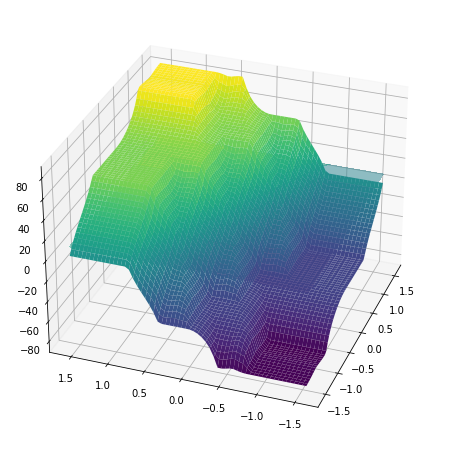

In [3]:
import numpy as np
import skfuzzy as fuzz
import math
from skfuzzy import control as ctrl
universe1 = np.linspace(-np.pi/2,np.pi/2,100)
universe2 = np.linspace(-np.pi/4,np.pi/4,100)
universe3 = np.linspace(-100,100,100)
alpha = ctrl.Antecedent(universe1,'alpha')
dalpha = ctrl.Antecedent(universe2,'dalpha')
F = ctrl.Consequent(universe3,'F')
names = ['LN','N','0','P','LP']
alpha.automf(names=names)
dalpha.automf(names=names)
F.automf(names=names)

rule0 = ctrl.Rule(antecedent = ((alpha['LN']&dalpha['LN'])|(alpha['LN']&dalpha['N'])|(alpha['N']&dalpha['LN'])),consequent = F['LN'],label = 'rule VP')

rule1 = ctrl.Rule(antecedent = ((alpha['0']&dalpha['LN'])|(alpha['0']&dalpha['N'])|(alpha['N']&dalpha['0'])|(alpha['N']&dalpha['N'])|
                                (alpha['LN']&dalpha['0'])|(alpha['P']&dalpha['LN'])|(alpha['LN']&dalpha['P'])),consequent = F['N'])

rule2 = ctrl.Rule(antecedent = ((alpha['LP']&dalpha['LN'])|(alpha['LN']&dalpha['LP'])|(alpha['P']&dalpha['N'])|(alpha['N']&dalpha['P'])|
                                (alpha['0']&dalpha['0'])),consequent = F['0'])

rule3 = ctrl.Rule(antecedent = ((alpha['P']&dalpha['P'])|(alpha['P']&dalpha['0'])|(alpha['0']&dalpha['P'])|(alpha['0']&dalpha['LP'])|
                                (alpha['LP']&dalpha['0'])|(alpha['N']&dalpha['LP'])|(alpha['LP']&dalpha['N'])),consequent = F['P'])

rule4 = ctrl.Rule(antecedent = ((alpha['LP']&dalpha['LP'])|(alpha['LP']&dalpha['P'])|(alpha['P']&dalpha['LP'])),consequent = F['LP'])

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=100*100+1)
upsample = np.linspace(-np.pi/2,np.pi/2,60)
x,y = np.meshgrid(upsample,upsample)
z = np.zeros_like(x)

for i in range(60):
  for j in range(60):
    sim.input['alpha'] = x[i,j]
    sim.input['dalpha'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['F']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride=1,cmap='viridis',linewidth=0.4,antialiased = True)
cset =ax.contourf(x,y,z,zdir ='z',offset = 9, cmap = 'viridis',alpha = 0.5)
cset =ax.contourf(x,y,z,zdir ='x',offset = 11, cmap = 'viridis',alpha = 0.5)
cset =ax.contourf(x,y,z,zdir ='y',offset = 11, cmap = 'viridis',alpha = 0.5)
ax.view_init(30,200)